In [495]:
import pandas as pd
import matplotlib.pyplot as plt

In [496]:
raw_data = pd.read_csv("swedish_population_by_year_and_sex_1860-2022.csv")
raw_data

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,...,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0


In [497]:
work_data = raw_data.melt(
    id_vars=["age", "sex"], var_name="year", value_name="population"
)
work_data

,age,sex,year,population
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110+,men,2022,0


In [498]:
work_data["age"] = work_data["age"].replace(r"\D+", "", regex=True).astype(int)
work_data["year"] = work_data["year"].astype(int)
work_data.dtypes

age            int64
sex           object
year           int64
population     int64
dtype: object

In [499]:
work_data["age_group"] = pd.cut(
    x=work_data["age"], bins=[-1, 14, 64, 110], labels=["children", "labour", "elderly"]
)
work_data

,age,sex,year,population,age_group
0,0,men,1860,60589,children
1,0,women,1860,58837,children
2,1,men,1860,56001,children
3,1,women,1860,54833,children
4,2,men,1860,52502,children
...,...,...,...,...,...
36181,108,women,2022,8,elderly
36182,109,men,2022,0,elderly
36183,109,women,2022,1,elderly
36184,110,men,2022,0,elderly


In [500]:
# add as_index=False or .reset_index(name="population_sum")
# without this the columns name is missing
groupby_y_a_s = work_data.groupby(
    by=["year", "age_group"], observed=False, as_index=False
)["population"].sum()
groupby_y_a_s

,year,age_group,population
0,1860,children,1292962
1,1860,labour,2365121
2,1860,elderly,201645
3,1861,children,1318714
4,1861,labour,2385678
...,...,...,...
484,2021,labour,6494457
485,2021,elderly,2118766
486,2022,children,1829093
487,2022,labour,6545326


In [501]:
# use pivot to transform age group row to columns
# .reset_index() adjust the columns, return dataframe object
pivot_df = groupby_y_a_s.pivot(
    index="year", columns="age_group", values="population"
).reset_index()
pivot_df

age_group,year,children,labour,elderly
0,1860,1292962,2365121,201645
1,1861,1318714,2385678,208106
2,1862,1338720,2405974,212807
3,1863,1362024,2431967,217661
4,1864,1380235,2460997,219574
...,...,...,...,...
158,2018,1819729,6374745,2035711
159,2019,1834821,6427401,2065367
160,2020,1837798,6453411,2088086
161,2021,1839103,6494457,2118766


In [502]:
# dependency ratio
pivot_df["dp_ratio"] = 100 * (
    (pivot_df["children"] + pivot_df["elderly"]) / pivot_df["labour"]
)

# children to total populatioin
pivot_df["child_to_total"] = 100 * (
    pivot_df["children"]
    / (pivot_df["children"] + pivot_df["elderly"] + pivot_df["labour"])
)

# elderly to total populatioin
pivot_df["elderly_to_total"] = 100 * (
    pivot_df["elderly"]
    / (pivot_df["children"] + pivot_df["elderly"] + pivot_df["labour"])
)

# dependant population to total population
pivot_df["dependant_to_total"] = 100 * (
    (pivot_df["elderly"] + pivot_df["children"])
    / (pivot_df["children"] + pivot_df["elderly"] + pivot_df["labour"])
)

pivot_df

age_group,year,children,labour,elderly,dp_ratio,child_to_total,elderly_to_total,dependant_to_total
0,1860,1292962,2365121,201645,63.193680,33.498785,5.224332,38.723117
1,1861,1318714,2385678,208106,63.999417,33.705167,5.319006,39.024173
2,1862,1338720,2405974,212807,64.486441,33.827408,5.377308,39.204715
3,1863,1362024,2431967,217661,64.955034,33.951699,5.425720,39.377419
4,1864,1380235,2460997,219574,65.006540,33.989188,5.407153,39.396342
...,...,...,...,...,...,...,...,...
158,2018,1819729,6374745,2035711,60.479909,17.787841,19.899063,37.686904
159,2019,1834821,6427401,2065367,60.680639,17.766209,19.998540,37.764748
160,2020,1837798,6453411,2088086,60.834247,17.706386,20.117802,37.824187
161,2021,1839103,6494457,2118766,60.942262,17.595155,20.270761,37.865916


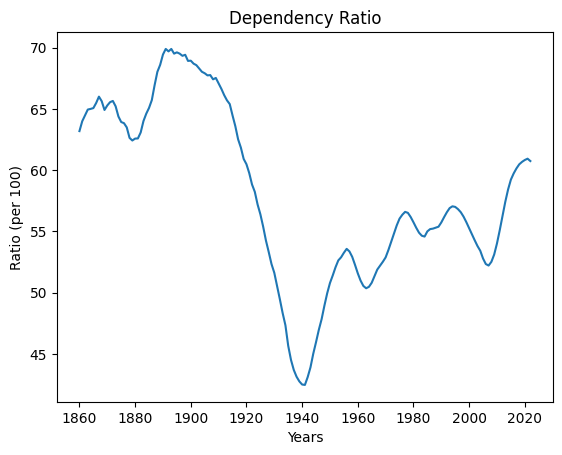

In [503]:
# Dependency ratio plot
fig, ax = plt.subplots()
x = pivot_df["year"]
y = pivot_df["dp_ratio"]
ax.plot(x, y)

plt.title("Dependency Ratio")
plt.xlabel("Years")
plt.ylabel("Ratio (per 100)")

plt.show()

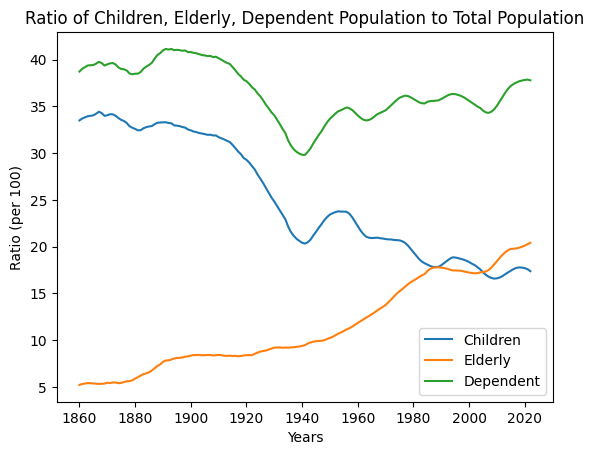

In [504]:
# children, elderly, total dependent population against total population

fig, ax = plt.subplots()
x = pivot_df["year"]
y1 = pivot_df["child_to_total"]
y2 = pivot_df["elderly_to_total"]
y3 = pivot_df["dependant_to_total"]
ax.plot(x, y1, label="Children")
ax.plot(x, y2, label="Elderly")
ax.plot(x, y3, label="Dependent")

plt.title("Ratio of Children, Elderly, Dependent Population to Total Population")
plt.xlabel("Years")
plt.ylabel("Ratio (per 100)")
# adding legend: https://stackoverflow.com/questions/19125722/adding-a-matplotlib-legend
plt.legend(loc="best")

plt.show()

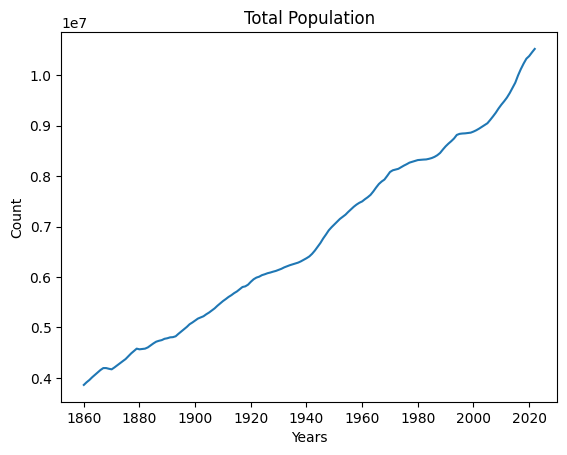

In [505]:
# total population
fig, ax = plt.subplots()

x = pivot_df["year"]
y = pivot_df["children"] + pivot_df["labour"] + pivot_df["elderly"]

ax.plot(x, y)

plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Total Population")

plt.show()

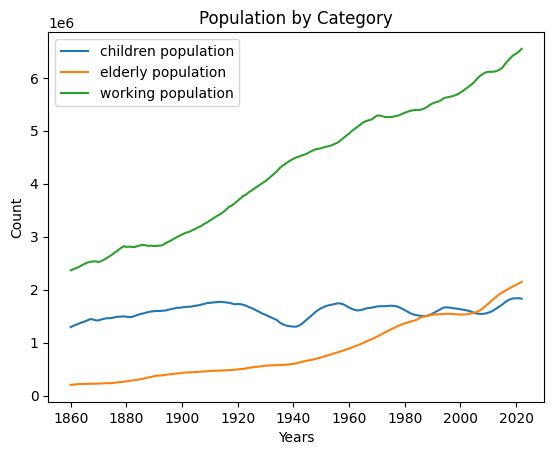

In [506]:
# population by each category
fig, ax = plt.subplots()

ax.plot(pivot_df["year"], pivot_df["children"], label="children population")
ax.plot(pivot_df["year"], pivot_df["elderly"], label="elderly population")
ax.plot(pivot_df["year"], pivot_df["labour"], label="working population")

plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Population by Category")
plt.legend(loc="best")

plt.show()